# Teil c - Merkmalstandardisierung

# Verbesserung durch Merkmalstandardisierung

## Methode der Standardisierung und Auswirkung auf die Algorithmen

Viele Lernalgorithmen machen es erforderlich die Merkmale zu standardisieren um eine optimale Leistung zu erzielen. Die Algorithmen Perzeptron und Adaline gehören zu den vielen Algorithmen, die von einer Standardisierung profitieren.

Im folgenden wird die Methode <i>Standardisierung</i> erläutert. Diese verleiht den Daten die Eigenschaften einer Standardnormalverteilung. Der Mittelwert jedes Merkmals beträgt 0, die Standardabweichung jeder Spalte beträgt 1. Um zum Beispiel das Merkmal j zu standardiesieren, wird der Mittelwert $\mu$ der jeweiligen Stichprobe abgezogen und das Ergebnis durch die Standardabweichung $\sigma$ dividiert. Das Standardisierungsverfahren wird auf alle Merkmale der Datenmenge angewendet.

$x_j^{\prime(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$. 

Die Standardisierung verbessert die Algorithmen, weil zum Auffinden einer guten/ optimalen Lösung (das globale Minimum der Straffunktion) weniger Schritte erforderlich sind. Folgende Abbildung stellen die Strafflächen einer zweidimensionalen Klassifizierungsaufgabe als Funktion der Gewichtungen dar.

<img src="./Figures/Merkmalstandardisierung.png" alt="drawing" style="width:500px;"/>


## Implementierung

Selektieren Sie exakt dieselben Daten des Iris-Datensatzes aus Teil a und nehmen Sie die Standardisierung vor. <br>

Trainineren Sie den entweder den Perzeptron-Algorithmus oder den Adaline-Algorithmus aus Teil a mit den standardisierten Daten mit verschiedenen Parametern. <br>

Vergleichen Sie die Ergebnisse zwischen den standardisierten Daten und den nicht-standardisierten Daten. Stellen Sie die verschiedenen Resultate dar.<br>

In [1]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline


df = pd.read_csv("./Data/iris.data", header=None, sep=",", names=["A", "B", "C", "D","E"])
df_shuffled = df.sample(frac=1) 
df_shuffled.head()

,A,B,C,D,E
27,5.2,3.5,1.5,0.2,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica


## Auswahl der Daten

In [2]:
dffilter = df_shuffled[df_shuffled["E"]!="Iris-virginica"].copy()
dffilter.loc[dffilter["E"] == "Iris-setosa" , "E"] =  0
dffilter.loc[dffilter["E"] == "Iris-versicolor" , "E"] =  1
        
X = np.array(dffilter[["A","C"]]) # TODO: implement 
y = np.array(dffilter["E"]) # TODO: implement
        

## Implementierung der Standardisierung

In [3]:
#normalice data column 
def normalize_colummn(feature):
    mean = feature.mean()
    std = feature.std()
    feature_array = feature.to_numpy()
    
    for index in range(len(feature_array)):
        feature_array[index] = (float(feature_array[index]) - mean) / std
        #print(float(feature_array[index]) - mean, feature_array[index])
    return pd.DataFrame(feature_array)

#normalize Age and Fare    
def normalize(df):
    new_dataFrame = df.copy()
    new_dataFrame.assign(A=normalize_colummn(new_dataFrame["A"]))
    new_dataFrame.assign(C=normalize_colummn(new_dataFrame["C"]))
    return  new_dataFrame # TODO implement

#normalize data
X_norm = np.array(normalize(dffilter[["A","C"]]))

## Training und Visualisierung des Errors

In [4]:
class Perceptron(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        self.w = np.random.normal(loc=0.01, size=3)
        self.w[0] = 1
        self.errors = []

        
    def gewichtete_summe(self, x):
        return x.dot(self.w[1:]) + self.w[0]

        
    def heaviside(self, summe):
        if summe >= 0:
            return 1
        else: 
            return 0
    
    def fit(self, X, y):
        for e in range(self.epochs):
            sum_error = 0
            for i in range(len(X)):
                summe = self.gewichtete_summe(X[i])

                prediction = self.heaviside(summe)
                error = y[i] - prediction
                sum_error = sum_error + np.abs(error)
                for j in range(len(self.w[1:])):
                    self.w[j+1] = self.w[j+1] + self.eta * error * X[i][j]
            self.errors.append(sum_error)
        
        return self.errors 
            

In [5]:
class Adaline(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        self.w = np.random.normal(loc=0.01, size=3)
        self.w[0] = 1
        self.cost = []
        
    def gewichtete_summe(self, x):
        return x.dot(self.w)
    
    def activation(self, X):
        #linear
        return X
    
    def heaviside(self, summe):
        if summe >= 0:
            return 1
        else: 
            return 0
        
    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X
    
    def fit(self, X, y):
            X = self._add_bias(X)
            for e in range(self.epochs):
                cost_epoch = 0
                errors = []
                predict_array = []
                
                for i in range(len(X)):
                    summe = self.gewichtete_summe(X[i])
                    activation_sum = self.activation(summe)
                    errors.append(activation_sum)
                    predict_array.append(self.heaviside(activation_sum))

                    
                #Δ𝑤𝑗=𝜂⋅(𝑦−𝑛𝑒𝑡)⋅𝑥𝑗 
                Y_minus_error = np.subtract(y, np.array(errors))
                self.w = self.w + self.eta * X.T.dot(Y_minus_error)
                cost_epoch= (np.array(Y_minus_error ) ** 2).sum() / 2.0
                self.cost.append(cost_epoch)
            
            return self.cost 

In [6]:
myPerceptron = Perceptron(eta=0.0001, epochs=1000)
p_error = myPerceptron.fit(X,y)

myPerceptron1 = Perceptron(eta=0.0001, epochs=1000)
p_error_norm = myPerceptron1.fit(X_norm,y)


In [7]:
myAdaline = Adaline(eta=0.0001, epochs=50)
a_error = myAdaline.fit(X,y)

myAdaline = Adaline(eta=0.0001, epochs=50)
a_error_norm = myAdaline.fit(X_norm,y)


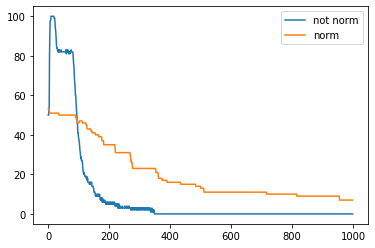

In [8]:
p_error
p_error_norm
a_error
a_error_norm



plt.plot( range(len(p_error)), p_error, label="not norm")
plt.plot( range(len(p_error_norm)),p_error_norm, label="norm")

plt.legend()


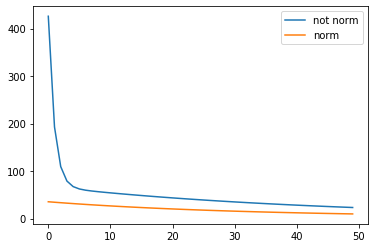

In [9]:
plt.plot( range(len(a_error)), a_error, label="not norm")
plt.plot( range(len(a_error_norm)),a_error_norm ,label="norm")
plt.legend()
